# Our World in COVID-19 - Data Analysis Project

The objective of this project is to explore the [COVID-19](https://github.com/owid/covid-19-data/tree/master/public/data) dataset.

# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
pd.options.display.float_format = "{:,.2f}".format

## Import the Data

In [2]:
#Use the requests library for better control
import requests
from io import StringIO

In [3]:
data_url = 'https://catalog.ourworldindata.org/garden/covid/latest/compact/compact.csv'

response = requests.get(data_url)

if response.status_code == 200:
    data = StringIO(response.text)
    df = pd.read_csv(data)
else:
    print(f'Failed to fetch data: {response.status_code}')

## EDA

In [4]:
#To display all the rows and columns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [5]:
#Display Top Rows
df.head().T

,0,1,2,3,4
country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
date,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05
total_cases,NaN,NaN,NaN,0.0,0.0
new_cases,NaN,NaN,NaN,0.0,0.0
new_cases_smoothed,NaN,NaN,NaN,NaN,NaN
total_cases_per_million,NaN,NaN,NaN,0.0,0.0
new_cases_per_million,NaN,NaN,NaN,0.0,0.0
new_cases_smoothed_per_million,NaN,NaN,NaN,NaN,NaN
total_deaths,NaN,NaN,NaN,0.0,0.0
new_deaths,NaN,NaN,NaN,0.0,0.0


In [6]:
#Check the column missing word count and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498511 entries, 0 to 498510
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     498511 non-null  object 
 1   date                                        498511 non-null  object 
 2   total_cases                                 483309 non-null  float64
 3   new_cases                                   480550 non-null  float64
 4   new_cases_smoothed                          479334 non-null  float64
 5   total_cases_per_million                     483309 non-null  float64
 6   new_cases_per_million                       480550 non-null  float64
 7   new_cases_smoothed_per_million              479334 non-null  float64
 8   total_deaths                                483309 non-null  float64
 9   new_deaths                                  481297 non-null  float64
 

In [7]:
#Convert the date column data type to date
df['date'] = pd.to_datetime(df['date'], errors = 'coerce', format= '%Y-%m-%d')

In [8]:
#Extract the category columns in the data
categ_col = [x for x in df.columns if str(df[x].dtype) == 'object']
print(categ_col)

['country', 'code', 'continent']


In [9]:
#Count the number of empty values
df.isna().sum().sort_values(ascending=False)

life_expectancy                               498511
weekly_icu_admissions_per_million             487518
weekly_icu_admissions                         487518
excess_mortality_cumulative_per_million       484909
excess_mortality                              484875
excess_mortality_cumulative_absolute          484875
excess_mortality_cumulative                   484875
weekly_hosp_admissions                        474014
weekly_hosp_admissions_per_million            474014
icu_patients_per_million                      459395
icu_patients                                  459395
hosp_patients_per_million                     457855
hosp_patients                                 457855
total_boosters                                439727
total_boosters_per_hundred                    439727
new_vaccinations                              429635
new_tests_per_thousand                        423108
new_tests                                     423108
people_fully_vaccinated_per_hundred           

In [10]:
#Find listing of unique countries
df.country.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Asia excl. China',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'England

In [11]:
#Count the countries with the least number of entries
df.groupby(by='country').agg(count=('country','count')).sort_values(by='count',ascending=True).head(10)

,count
country,
Western Sahara,1
Transnistria,72
England & Wales,313
Winter Olympics 2022,341
Summer Olympics 2020,525
Cote d'Ivoire,1146
Wales,1198
Macao,1232
England,1359


In [12]:
#Exploring the dataset
df[(df.country == 'Kenya') & (df.date >= pd.to_datetime('2020-02-01')) & (df.total_cases > 0) & (df.new_deaths > 0)].sample(30)

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,new_deaths_smoothed,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,excess_mortality,excess_mortality_cumulative,excess_mortality_cumulative_absolute,excess_mortality_cumulative_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,icu_patients,icu_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,stringency_index,reproduction_rate,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,code,continent,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
225842,Kenya,2021-06-13,175176.0,403.0,407.28570,3228.907700,7.428242,7.507238,3396.0,18.0,18.857143,62.596306,0.331783,0.347582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.74,1.1679,NaN,NaN,NaN,NaN,5431.0,0.102,6.192718,16.650652,1113158.0,986881.0,126277.0,NaN,NaN,18511.1430,2.051813,1.819055,0.232758,NaN,341.204100,1640.2858,0.003023,KEN,Africa,54252404.0,95.32348,19.272,NaN,4881.5317,36.146057,4.0,37.59924,NaN,0.601
225695,Kenya,2021-01-17,99082.0,223.0,128.28572,1826.315400,4.110417,2.364609,1728.0,2.0,3.428571,31.851124,0.036865,0.063197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.70,0.8538,NaN,NaN,NaN,NaN,4694.0,0.089,3.902423,26.916569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KEN,Africa,54252404.0,95.32348,19.272,NaN,4881.5317,36.146057,4.0,37.59924,NaN,0.601
225902,Kenya,2021-08-12,215730.0,1974.0,1291.28580,3976.413600,36.385483,23.801447,4241.0,30.0,30.857143,78.171650,0.552971,0.568770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.78,1.1306,NaN,NaN,NaN,NaN,5431.0,0.102,21.353605,4.702028,1922085.0,1192418.0,729667.0,NaN,40097.0,24546.4280,3.542857,2.197908,1.344949,NaN,452.448670,16658.5720,0.030706,KEN,Africa,54252404.0,95.32348,19.272,NaN,4881.5317,36.146057,4.0,37.59924,NaN,0.601
225663,Kenya,2020-12-16,92459.0,404.0,479.85715,1704.237800,7.446675,8.844901,1604.0,11.0,8.428572,29.565510,0.202756,0.155359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.41,0.7056,NaN,NaN,NaN,NaN,5163.0,0.097,9.188688,10.954479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KEN,Africa,54252404.0,95.32348,19.272,NaN,4881.5317,36.146057,4.0,37.59924,NaN,0.601
225644,Kenya,2020-11-27,80102.0,780.0,851.00000,1476.469100,14.377243,15.685941,1427.0,10.0,13.857142,26.302982,0.184324,0.255420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.85,0.9286,NaN,NaN,NaN,NaN,8312.0,0.157,14.219577,7.346563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KEN,Africa,54252404.0,95.32348,19.272,NaN,4881.5317,36.146057,4.0,37.59924,NaN,0.601
225671,Kenya,2020-12-24,95195.0,427.0,334.57144,1754.668800,7.870619,6.166942,1648.0,1.0,4.857143,30.376534,0.018432,0.089529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.41,0.6131,NaN,NaN,NaN,NaN,4905.0,0.093,7.617413,13.235140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KEN,Africa,54252404.0,95.32348,19.272,NaN,4881.5317,36.146057,4.0,37.59924,NaN,0.601
225773,Kenya,2021-04-05,138988.0,911.0,1253.42860,2561.877200,16.791883,23.103651,2224.0,18.0,15.285714,40.993576,0.331783,0.281752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.13,0.9425,NaN,NaN,NaN,NaN,6092.0,0.115,21.109652,4.741857,NaN,NaN,NaN,NaN,NaN,19297.0570,NaN,NaN,NaN,NaN,355.690370,19297.0570,0.035569,KEN,Afric

In [13]:
#Examine the column quality to find out based on a country the number of columns with data
df[df.country == 'Kenya'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1944 entries, 225313 to 227256
Data columns (total 61 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   country                                     1944 non-null   object        
 1   date                                        1944 non-null   datetime64[ns]
 2   total_cases                                 1941 non-null   float64       
 3   new_cases                                   1940 non-null   float64       
 4   new_cases_smoothed                          1936 non-null   float64       
 5   total_cases_per_million                     1941 non-null   float64       
 6   new_cases_per_million                       1940 non-null   float64       
 7   new_cases_smoothed_per_million              1936 non-null   float64       
 8   total_deaths                                1941 non-null   float64       
 9   new_de

In [14]:
df.groupby(by='country').agg(count=('country','count')).query('count==1976').sort_values(by='count', ascending = False)

,count
country,
French Guiana,1976
Guadeloupe,1976
Martinique,1976
Mayotte,1976
Montenegro,1976
Reunion,1976


In [15]:
#Select countries which have data at least 75% of the maximum number of data points
threshold = 0.75 * df.groupby(by='country').agg(count=('country','count')).sort_values(by='count', ascending = False)[:1].iloc[0,0]
print(threshold)

1484.25


In [16]:
#Create a new DF based on the threshold
selected_countries = df.groupby(by='country')\
                        .agg(count=('country','count'))\
                        .query(f'count>{threshold}')\
                        .sort_values(by='count',ascending=False)
selected_countries.head()

,count
country,
Finland,1979
Bulgaria,1979
Portugal,1979
Slovenia,1979
Italy,1979


In [17]:
len(selected_countries)

251

In [18]:
len(df.country.unique())

262

In [29]:
df_selected_countries = df[df.country.isin([item for item in selected_countries.index])]

## 5️⃣ Visualizing Vaccination Progress

In [45]:
#Aggregate the total number of vacinnations by date
df_cummulative_vaccination = df_selected_countries\
                                .groupby(by='date')\
                                .agg(sum_total_vaccination=('people_vaccinated','sum'))\
                                .query('sum_total_vaccination>1')\
                                .sort_values(by='date')
df_cummulative_vaccination.head()

,sum_total_vaccination
date,
2020-12-02,"1,956,259,004.00"
2020-12-03,"1,956,259,007.00"
2020-12-04,"1,956,259,008.50"
2020-12-05,"1,956,259,011.20"
2020-12-06,"1,956,259,012.80"


In [46]:
df_cummulative_vaccination.tail()

,sum_total_vaccination
date,
2024-08-08,"18,331,253,521.00"
2024-08-09,"18,331,253,525.00"
2024-08-10,"18,329,295,226.00"
2024-08-11,"18,329,295,226.00"
2024-08-12,"18,303,114,961.00"


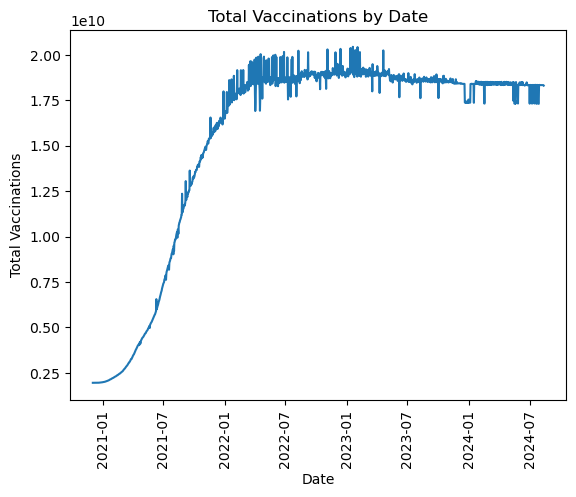

In [47]:
#Plot the vaccinations by date
plt.title('Total Vaccinations by Date')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
sns.lineplot(data=df_cummulative_vaccination, x = df_cummulative_vaccination.index, y = df_cummulative_vaccination.sum_total_vaccination)
plt.xticks(rotation=90)
plt.show()